In [33]:
##In the first notebook we generated a column of 3230 URL addresses of boxscore of NHL games between 2017 and 2020:

import pandas as pd

url_c=pd.read_csv("C:/Users/maya rowen/Downloads/urls.csv")
url_c=url_c.iloc[:,0]

##Recall from the last notebook (Intro to BeautifulSoup) that we used BeautifulSoup and re to extract the name of the 
##Visiting team from the first game of the first NHL game in October 2017:

import requests
import urllib.request
from bs4 import BeautifulSoup

game1=url_c.iloc[0] ##The first URL isolated from the dataframe
response=requests.get(game1) ##accessing the url
soup=BeautifulSoup(response.text, "html.parser") ##the HTML code 
soup.contents ##displaying the code
table2=soup.table.contents[1]##calling the second table
table2_10px=table2.findAll(style="font-size: 10px;font-weight:bold")##extracting bold text with 10 pt. font
table2_10px_text=table2_10px[0].get_text()##the text content of the first bold 10 pt bold element of the second table

import re

visiting_team_info=re.split("Game",table2_10px_text)##the text content split into a list on the substring 'Game'
visiting_team_info[0]##The first element of the list; the visiting team


'TORONTO MAPLE LEAFS'

In [34]:
##I've isolated the character string that represents the visiting team in the first game in my data set...

##Now I want to extract the visiting team from all 3,230 games of interest. 

##I'll do this by defining a function to run on the entire url_c column....let x denote the url:



def visitor_f(x):
    
    response=requests.get(x)
    soup=BeautifulSoup(response.text, "html.parser") ##access the html code for each x (url)
    table=soup.table.contents[1] ##organize the html contents by table
    visit=table.findAll(style="font-size: 10px;font-weight:bold")[0].get_text() ##isolate table text in 10px bold
    visit_bits=re.split("Game",visit)##split the visiting team info text string into a list of substrings at "Game" 
    visitor=visit_bits[0] ##call only the first substring
    return(visitor)

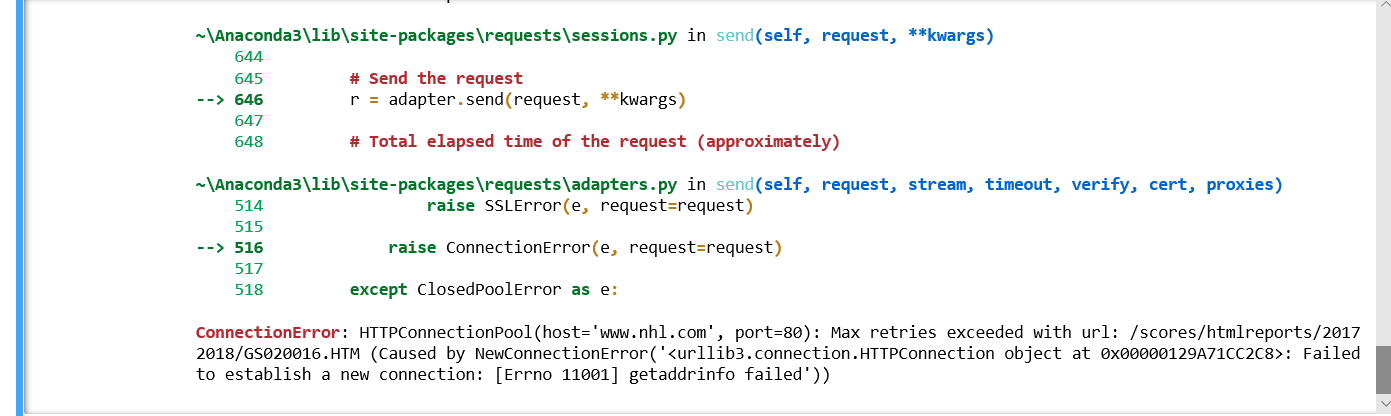

In [35]:
##I want to apply the function to each URL in my url_c column, as such:

##visitor_c=url_c.apply(visitor_f)......This should create a column of visiting teams for each game

##Unfortunately, when I try to run that code, I get this error:

from IPython.display import Image

PATH = "/Users/maya rowen/Pictures/"
Image(filename = PATH + "err.png", width=900, height=900)

In [44]:
##I split the url_c column into 5 digestible sub-columns

url_c1=url_c[0:650]
url_c2=url_c[650:1300]
url_c3=url_c[1300:1950]
url_c4=url_c[1950:2600]
url_c5=url_c[2600:]

In [46]:
##and run the function on each sub-column

visitor_c1=url_c1.apply(visitor_f)

In [47]:
visitor_c2=url_c2.apply(visitor_f)

In [48]:
visitor_c3=url_c3.apply(visitor_f)

In [49]:
visitor_c4=url_c4.apply(visitor_f)

In [50]:
visitor_c5=url_c5.apply(visitor_f)

In [64]:
##The output is 5 lists of visitor team names, each corresponding to a sub-column
visitor_c1

,0
0,TORONTO MAPLE LEAFS
1,ST. LOUIS BLUES
2,CALGARY FLAMES
3,PHILADELPHIA FLYERS
4,NASHVILLE PREDATORS
...,...
645,SAN JOSE SHARKS
646,FLORIDA PANTHERS
647,VANCOUVER CANUCKS
648,TAMPA BAY LIGHTNING


In [65]:
##I stack the sub-columns into a single column that corresonds to url_c

from pandas import DataFrame

visitor_c1=DataFrame(visitor_c1)
visitor_c12=visitor_c1.append(pd.DataFrame(data = visitor_c2), ignore_index=True)
visitor_c123=visitor_c12.append(pd.DataFrame(data = visitor_c3), ignore_index=True)
visitor_c1234=visitor_c123.append(pd.DataFrame(data = visitor_c4), ignore_index=True)
visitor_c12345=visitor_c1234.append(pd.DataFrame(data = visitor_c5), ignore_index=True)
visitor_c=visitor_c12345.iloc[:,0]
visitor_c

##Now that I've used a function to extract my first datapoint for each game, I'll move into my next notebook and mine
##more data, namely scoring statistics.

##But first, I'll export my very first column as a CSV:

export_csv = visitor_c.to_csv(r'C:/Users/maya rowen/Downloads/visitor_C.csv', index = None, header=True)